In [1]:
#!pip install textblob

In [2]:
import pandas as pd
from textblob import TextBlob

import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('input/amazon_alexa.tsv', delimiter = '\t')
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# lets check if the dataset has any Missing Values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
# lets check the Descriptive Summary of the Dataset
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# lets check the summary of Date, Variation and Reviews
data.describe(include = 'object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [6]:
# lets check the Value Counts for Variation 
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [7]:
# calculating the Character Count in the Reviews
data['char_count'] = data['verified_reviews'].apply(len)

In [8]:
# calculating the Word Count
data['word_count'] = data['verified_reviews'].apply(lambda x: len(x.split()))

In [9]:
# Calculating the Word Density
data['word_density'] = data['char_count'] / (data['word_count']+1)

In [10]:
# importing the List of Punctuations
import string
punctuation = string.punctuation

# Calculating the Punctuation Count
data['punctuation_count'] = data['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [11]:
## lets summarize the Newly Created Features
data[['char_count','word_count','word_density','punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049524,25.293016,4.605345,3.887937
std,182.099952,34.584971,1.134737,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


In [12]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews'] = data['verified_reviews'].apply(drop_numbers)

# lets visualize the Top 10 Reviews after Removal of Punctuations and Numbers
data['verified_reviews'].head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My  y...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the th one I've purchased. I'm...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

### Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [13]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [14]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


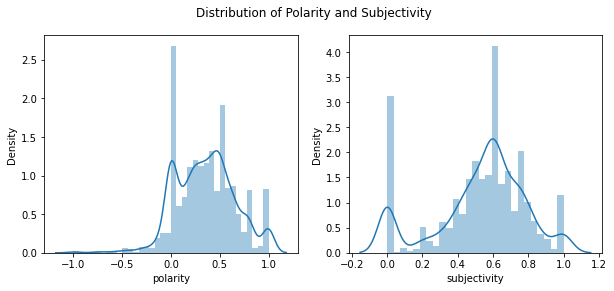

In [15]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


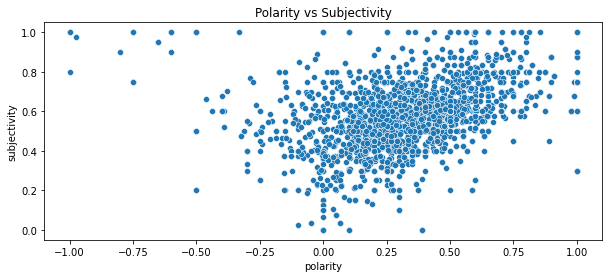

In [16]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


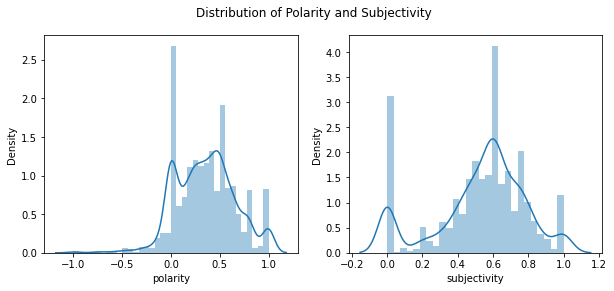

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


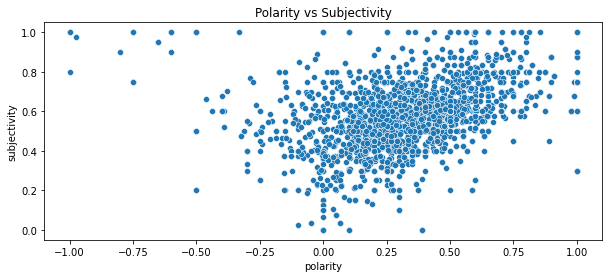

In [17]:
### Text Polarity
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

### Text Subjectivity
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

# lets check relation between Polarity and Subjectivity

sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

### Tokenization

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module

In [18]:
import pandas as pd
import nltk             # for Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

data = pd.read_csv('input/amazon_alexa.tsv', delimiter = '\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
# sentence Tokenizations
sentence_data = "The First sentence is about Python. The Second: about Django. You can learn Python, \
Django and Data Ananlysis here. "

nltk_tokens = nltk.sent_tokenize(sentence_data)
print (nltk_tokens)

['The First sentence is about Python.', 'The Second: about Django.', 'You can learn Python, Django and Data Ananlysis here.']


In [20]:
# Non English Tokenization
german_tokenizer = nltk.data.load('tokenizers/punkt/german.pickle')

german_tokens=german_tokenizer.tokenize('Wie geht es Ihnen?  Gut, danke.')
print(german_tokens)

['Wie geht es Ihnen?', 'Gut, danke.']


In [21]:
# Words Tokenization
word_data = "It originated from the idea that there are readers who prefer learning new \
skills from the comforts of their drawing rooms"

nltk_tokens = nltk.word_tokenize(word_data)
print (nltk_tokens)

['It', 'originated', 'from', 'the', 'idea', 'that', 'there', 'are', 'readers', 'who', 'prefer', 'learning', 'new', 'skills', 'from', 'the', 'comforts', 'of', 'their', 'drawing', 'rooms']


## Bag of Words and TF-IDF

In [22]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cti110016\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])  ## Removing all Unecessary items
    review = review.lower()                                         ## Converting into Lower Case
    review = review.split()
    ps = PorterStemmer()                                            ## Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  ## Removing Stopwords
    review = ' '.join(review)
    corpus.append(review)

### Bag of Words

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [24]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [25]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


 ## Removing Special and Accented Characters

In [26]:
# for Importing the Dataset
import pandas as pd

# for removing accented and special chracters
import unicodedata

# for special characters
import re

### Removing Accented Characters

Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté etc

In [27]:
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
data['verified_reviews'] = data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis = 1)

### Removing Special Characters

Special characters, as you know, are non-alphanumeric characters. These characters are most often found in comments, references, currency numbers etc. These characters add no value to text-understanding and induce noise into algorithms. Thankfully, regular-expressions (regex) can be used to get rid of these characters and numbers.

In [28]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
data['verified_reviews'] = data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis = 1)

In [29]:
## lets check the Head of Verified Reviews After Cleaning
data['verified_reviews'][:5]

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

## Visualizing Most Frequent Words

In [30]:
# for mathematical operation
import numpy as np

# for Importing the Dataset
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

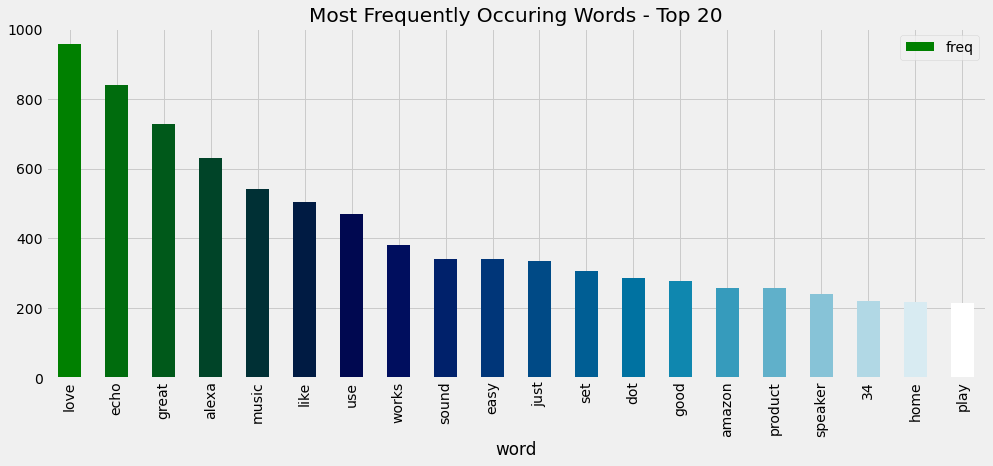

In [31]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

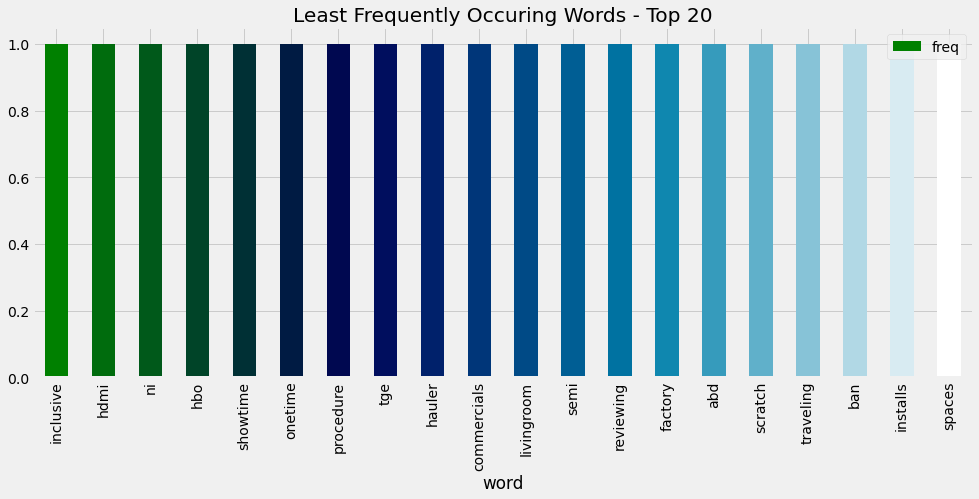

In [32]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

## Counting Nouns and Verbs in the Text

In [33]:
# lets create a Part of speech Dictionary
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

### Nouns

A noun is a word that functions as the name of a specific object or set of objects, such as living creatures, places, actions, qualities, states of existence, or ideas. However, noun is not a semantic category, so that it cannot be characterized in terms of its meaning.

In [34]:
# lets calculate the count of Nouns in the Text
data['noun_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'noun'))

### Verbs

A verb, from the Latin verbum meaning word, is a word that in syntax conveys an action, an occurrence, or a state of being. In the usual description of English, the basic form, with or without the particle to, is the infinitive. In many languages, verbs are inflected to encode tense, aspect, mood, and voice.

In [35]:
# lets calculate the count of Verbs in the Text
data['verb_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'verb'))

In [36]:
#3 lets summarize the Newly Created Features
data[['noun_count','verb_count']].describe()

,noun_count,verb_count
count,3150.000000,3150.000000
mean,6.045714,5.077778
std,8.359412,7.145006
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,8.000000,6.000000
max,139.000000,102.000000


## Stopwords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [37]:
#!pip install gensim

In [38]:
# for Importing the Dataset
import pandas as pd

# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for regular expressions
import re

In [39]:
# lets print the Stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
# Now lets Remove the Stopwords

# targeting only English Stopwords
stop = stopwords.words('english')
stop_words = []
from nltk.tokenize import word_tokenize

text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)


['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [41]:
!pip install gensim

In [42]:
# using gensim to remove stopwords
from gensim.parsing.preprocessing import remove_stopwords

text = "Nick likes to play football, however he is not too fond of tennis."
filtered_sentence = remove_stopwords(text)

print(filtered_sentence)

Nick likes play football, fond tennis.


## Visualizing N Grams

In [43]:
import nltk
import collections
from nltk.util import ngrams 

import pandas as pd
data = pd.read_csv('input/amazon_alexa.tsv', delimiter = '\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [44]:
data.shape

(3150, 5)

In [45]:
# Visualizing the BiGrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo!'), 1),
 (('Echo!', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it!'), 1),
 (('it!', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [46]:
# Visualizing the Trigrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esTrigramFreq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo!'), 1),
 (('my', 'Echo!', '1'), 1),
 (('Echo!', '1', 'Loved'), 1),
 (('1', 'Loved', 'it!'), 1),
 (('Loved', 'it!', '2'), 1),
 (('it!', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]

## Counting Adjectives, Adverbs, and Pronouns

In [47]:
# for Importing the Dataset
import pandas as pd

In [48]:
# lets read the dataset
data = pd.read_csv('input/amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [49]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [50]:
# lets create a Part of speech Dictionary
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

### Adjectives

In linguistics, an adjective is a word that modifies a noun or noun phrase or describes its referent. Its semantic role is to change information given by the noun. Adjectives are one of the main parts of speech of the English language, although historically they were classed together with nouns.

In [51]:
# lets calculate the Count of Adjectives in the Text
data['adj_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'adj'))

### Adverbs

An adverb is a word or an expression that modifies a verb, adjective, another adverb, determiner, clause, preposition, or sentence. Adverbs typically express manner, place, time, frequency, degree, level of certainty, etc., answering questions such as how?, in what way?, when?, where?, and to what extent?

In [52]:
# lets calculate the count of Adverbs in the Text
data['adv_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'adv'))

### Pronouns

A pronoun (I, me, he, she, herself, you, it, that, they, each, few, many, who, whoever, whose, someone, everybody, etc.) is a word that takes the place of a noun. In the sentence Joe saw Jill, and he waved at her, the pronouns he and her take the place of Joe and Jill, respectively.

In [53]:
# lets calculate the count of Pronouns in the Text
data['pron_count'] = data['verified_reviews'].apply(lambda x: pos_check(x, 'pron'))

In [54]:
## lets summarize the Newly Created features
data[['adj_count','adv_count','pron_count']].describe()

,adj_count,adv_count,pron_count
count,3150.000000,3150.000000,3150.000000
mean,2.172381,2.002540,3.242222
std,2.935390,3.277083,4.627235
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000
75%,3.000000,3.000000,4.000000
max,39.000000,54.000000,70.000000


## Implementing N Grams Analysis

### Concept of N Grams

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

In [55]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cti110016\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])  ## Removing all Unecessary items
    review = review.lower()                                         ## Converting into Lower Case
    review = review.split()
    ps = PorterStemmer()                                            ## Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  ## Removing Stopwords
    review = ' '.join(review)
    corpus.append(review)

### Bag of Words with N Grams

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [57]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500, ngram_range=(2, 2)) # to use trigrams ngram_range=(3, 3))

x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [58]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500, ngram_range=(2, 2)) #to use trigrams ngram_range = (3, 3)

x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


## Cloud

In [61]:
#!pip install wordcloud

In [63]:
# import pandas as pd

# # for Wordscloud
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import CountVectorizer

# # for visualization
# import matplotlib.pyplot as plt

# cv = CountVectorizer(stop_words = 'english')
# words = cv.fit_transform(data.verified_reviews)
# sum_words = words.sum(axis=0)

# words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
# words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

# wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(10, 10))
# plt.axis('off')
# plt.imshow(wordcloud)
# plt.title("Vocabulary from Reviews", fontsize = 20)
# plt.show()

## Naive Bayes Classifier

In [64]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cti110016\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
## Cleaning the Data

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [66]:
# Extracting the Features using the Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [67]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2205, 2500)
(2205,)
(945, 2500)
(945,)


### Naive Bayes Classifier

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with Kernel density estimation, they can achieve higher accuracy levels.

In [68]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6408163265306123
Testing Accuracy : 0.5862433862433862


### Support Vector Machines

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis

In [69]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.982766439909297
Testing Accuracy : 0.9291005291005291
